# <u>LECTURE DE TEXTE: Comment traiter du texte avec Python ? </u>


### [1.Opérations simples](#Opérations-textuelles-simples)
-  [Ouverture de fichiers plats (tsv,txt...)](#Opérations-textuelles-simples)
-  [Lecture d'une partie de verbatim sous forme de dictionnaire](#Opérations-textuelles-simples) 
-  [Split d'un verbatim suivant un séparateur spécifique](#Parsing-de-la-donnée)
-  [Création d'un pandas dataframe à partir d'un dictionnaire](#Passage-en-dataframe)

    
### [2.Exploration de corpus](#Explorer-le-corpus-de-documents)
- [Utilisation de l'instruction format pour afficher du langage naturel explicatif](#Explorer-le-corpus-de-documents)
 
    
### [3.Expressions régulières](#Expressions-Régulières)
- [Split pour supprimer les expressions régulières non voulues](#Split)
- [Findall pour sélectionner des expressions régulières spécifiques (inverse de split)](#Findall)
- [Sub pour remplacer des expressions régulières](#Sub)
- [Autres fonctions](#Sub)
    
### [4.Préprocessing: nettoyage du texte](#Preprocessing:-Nettoyage-du-Texte)
- [Suppression de la ponctuation](#Supression-de-la-ponctuation)
- [Tokenization](#Tokenization)
- [Stopwords](#Stopwords) 

### [5.Préprocessing: Traitement du langage naturel](#Preprocessing:-Traitement-du-Langage)
- [Stemming](#Stemming)
- [Lemmatization](#Lemmatization)


### [6.Vectorisation](#Vectorisation)
- [Création d'une matrice prenant le nombre d'occurences](#Premier-exemple:)
- [N-grams](#N-Grams)
- [TF-IDF](#TF-IDF)

### [7.Feature Engineering](#Feature-Engineering)
- [Création d'une feature](#Création-de-features)
- [Evaluation d'une feature](#Evaluation-de-features)
- [Identification de transformations](#Identification-de-transformation)
- [Box-Cox transformation](#Box-Cox-tranformation)

### [8.Machine Learning](#Machine-Learning)
- [Métriques d'évaluation](#Métriques-d'évaluation)
- [Random Forest: Apprentissage](#Random-Forest:-Apprentissage)
- [Random Forest: Scoring](#Random-Forest:-Scoring)
- [Random Forest: Autotuning Grid Search](#Random-Forest:-Grid-Search)
- [Random Forest: Evaluation](#Random-Forest:-Evaluation)
- [Gradient Boosting: Grid Search et évaluation](#Gradient-Boosting:-Grid-Search)
- [Sélection du modèle](#Sélection-du-modèle)

In [1]:
import pandas as pd
import nltk
import string
import re
from matplotlib import pyplot
import numpy as np
from PIL import Image
wn=nltk.WordNetLemmatizer()
ps=nltk.PorterStemmer()
dir(ps)
pd.set_option('display.max_colwidth',100)

# Opérations textuelles simples

-  [Ouverture de fichiers plats (tsv,txt...)](#Opérations-textuelles-simples)
-  [Lecture d'une partie de verbatim sous forme de dictionnaire](#Opérations-textuelles-simples) 
-  [Split d'un verbatim suivant un séparateur spécifique](#Parsing-de-la-donnée)
-  [Création d'un pandas dataframe à partir d'un dictionnaire](#Passage-en-dataframe)

 Pour commencer, comment lire des fichiers plats? (tsv, txt)... Aucun package n'est nécessaire, la fonction open de Python permet de le faire nativement ! >

In [1]:
SPAM_COLLECTION= open('SMSSpamCollection.tsv').read()
countries=open('Countries_africa.txt').read()

Imprimer les 500 premiers caractères

In [2]:
SPAM_COLLECTION[0:500]

"ham\tI've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tNah I don't think he goes to usf, he lives around here though\nham\tEven my brother is not like to speak with me. They treat me like aid"

### Parsing de la donnée

Comment spliter la donnée selon un séparateur? Ici, on remplace les tabulations par des passages à la ligne, et on split la donnée, le deuxième exemple montre comment on pourrait exploiter ceci pour exécuter un CRF

In [5]:
splited_spam=SPAM_COLLECTION.replace("\t",'\n').split('\n')

In [6]:
splited_crf=SPAM_COLLECTION.replace('\t',' ').split(' ')
splited_crf[0:5]

['ham', "I've", 'been', 'searching', 'for']

Sélectionner tous les 2 enregistrements et ne conserver que les éléments spam/ham (en ne prenant que les 5 premiers) :

In [7]:
splited_spam[0::2][0:5]

['ham', 'spam', 'ham', 'ham', 'ham']

In [8]:
labelList=splited_spam[0::2]
TextList=splited_spam[1::2]
print(TextList[0:5])

["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.", "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", "Nah I don't think he goes to usf, he lives around here though", 'Even my brother is not like to speak with me. They treat me like aids patent.', 'I HAVE A DATE ON SUNDAY WITH WILL!!']


### Passage en dataframe

<b> Création d'un Dataframe Pandas basé sur des dictionnaires</b>

On vérifie que les deux listes sont de même dimension

In [9]:
print(len(TextList)," ",len(labelList))
Label=labelList[0:-1]
print(len(Label))

5570   5571
5570


In [10]:
import pandas as pd
MailData= pd.DataFrame({
    'label': Label,
    'text': TextList
})

In [39]:
MailData.head()

,label,text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


aurait pu être fait plus simplement ainsi : 

In [12]:
#aurait pu être fait de cette façon: 
MailData=pd.DataFrame({"label":labelList[:-1],"text":TextList})

Plus simplement, on serait arrivé au même résultat en important directement le tsv dans un dataframe en utilisant read_csv

In [2]:
MailData=pd.read_csv('SMSSpamCollection.tsv',sep='\t',header=None)
MailData=MailData.rename(columns={0:'label',1:'text'})


## Explorer le corpus de documents

In [62]:
print('Le corpus contient {} lignes et {} columns'.format(len(MailData),len(MailData.columns)))

Le corpus contient 5568 lignes et 2 columns


In [71]:
print('Sur {} lignes, il y a {} spams et {} hams'.format(len(MailData)
                                                         ,len(MailData[(MailData['label']=='spam')])
                                                         ,len(MailData[(MailData['label']=='ham')])))

Sur 5568 lignes, il y a 746 spams et 4822 hams


In [74]:
print('Il y a {} valeurs manquantes pour la variable label'.format(MailData['label'].isnull().sum()))
print('Il y a {} valeurs manquantes pour la variable text'.format(MailData['text'].isnull().sum()))

Il y a 0 valeurs manquantes pour la variable label
Il y a 0 valeurs manquantes pour la variable text


## Expressions Régulières


- [Split pour supprimer les expressions régulières non voulues](#Split)
- [Findall pour sélectionner des expressions régulières spécifiques (inverse de split)](#Findall)
- [Sub pour remplacer des expressions régulières](#Sub)
- [Autres fonctions](#Sub)
    

### Split

Supression de caractères basées sur des expressions régulières, il existe une fonction définie hors package qui permet de spliter l'information, sans utiliser de regex. Nous allons montrer la différence avec la fonction split du package re.

In [35]:
import re

re_test = 'This is a made up string to test 2 different regex methods'
re_test_messy = 'This      is a made up     string to test 2    different regex methods'
re_test_messy1 = 'This-is-a-made/up.string*to>>>>test----2""""""different~regex-methods'

re_test.split(" ")

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

Dans le cas de re_test_messy, il est nécessaire d'utiliser une expression régulière pour identifier une expression régulière contenant un ou plusieurs espaces

In [127]:
re.split('\s+',re_test_messy)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

Pour la troisième variable re_test_messy1, il est préférable de partir sur un caractère non littéraire (non compris [A-Za-z])

In [128]:
re.split('\W+',re_test_messy1)


['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

### Findall

Utilisons findall pour faire une recherche spécifique, on pourra donc généraliser les étapes précédentes à détecter tout simplement les words-characters


In [129]:
re.findall('[a-z]{4,}',re_test)

re.findall('\w+',re_test_messy)

re.findall('\w+',re_test_messy1)


['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

### Sub

Remplacer les chaines de caractères avec des REGEX

In [36]:
pep8_test = 'I try to follow PEP8 guidelines'
pep7_test = 'I try to follow PEP7 guidelines'
peep8_test = 'I try to follow PEEP8 guidelines'

re.sub('[A-Z]+[0-9]+','PEP8 Python Styleguide',peep8_test)

'I try to follow PEP8 Python Styleguide guidelines'

### Autres fonctions


- re.search()
- re.match()
- re.fullmatch()
- re.finditer()
- re.escape()

## Preprocessing: Nettoyage du Texte

- [Suppression de la ponctuation](#Supression-de-la-ponctuation)
- [Tokenization](#Tokenization)
- [Stopwords](#Stopwords) 

Voicic la donnée, pour rappel :

In [10]:
MailData.head(3)

,label,text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."


### Supression de la ponctuation


Pour supprimer la ponctuation, il est nécessaire d'identifier ce qu'est une chaine de caractères, grace au package string, qui identifie la ponctuation

In [32]:
import string
punct=string.punctuation


In [60]:
text= "I love, Python."
text[:3]

'I l'

In [75]:
#ma manière de faire (marche pas mais je comprends pas pourquoi)
def remove_punct(text):
    punct=string.punctuation
    for i in range (1,len(text)):
        for j in range(1,len(punct)):
            if text[i]==punct[j]:
                text=text[:i]+text[i+1:]
    print(text)


In [104]:
#La bonne manière
def remove_punct(text):
    punct=string.punctuation
    text_cleaned=[char for char in text if char not in punct]
    return(text_cleaned)

In [105]:
remove_punct('I love, Python.')

['I', ' ', 'l', 'o', 'v', 'e', ' ', 'P', 'y', 't', 'h', 'o', 'n']

Ceci n'est pas le résultat attendu, il donne une liste de caractères, et non pas la chaine libre. Voici comment nous allons corriger la fonction finale, pour ainsi l'appliquer à l'ensemble de notre dataframe:

In [107]:
"".join(remove_punct('I love, Python.'))

'I love Python'

In [108]:
MailData['text_cleaned']=MailData['text'].apply(lambda x: "".join(remove_punct(x)))

In [109]:
MailData.head()

,label,text,text_cleaned
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


Le problème de l'espace supprimé pour "I've" ou "I'm" reste problématique, en anglais comme en français. IL serait préférable de corriger la fonction, pour avoir une logique de considérer les ' comme des espaces, au lieu de le supprimer comme une simple ponctuation, car Ive ne veut rien dire ! 

In [116]:
def remove_punct_final(text):
    text=text.replace("'"," ")
    text_cleaned="".join([char for char in text if char not in string.punctuation])
    return(text_cleaned)

In [118]:
remove_punct_final("I've been in Toulon, it was nice ! ")

'I ve been in Toulon it was nice  '

In [119]:
MailData['text_cleaned']=MailData['text'].apply(lambda x: remove_punct_final(x))

In [120]:
MailData.head()

,label,text,text_cleaned
0,ham,I've been searching for the right words to tha...,I ve been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I don t think he goes to usf he lives arou...
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


### Tokenization

GOOD JOB ! Passons à la Tokenization, pour cela, on peut utiliser un Regex, via le package re

In [131]:
re.split("\s+","I ve been searching for the right words to that")

['I', 've', 'been', 'searching', 'for', 'the', 'right', 'words', 'to', 'that']

Nous allons donc créer une fonction qui split le texte en token, et le passe en lowercase.

In [140]:
def tokenization(text):
    token=re.split("\s+",text.lower())
    return(token)

MailData['tokens']=MailData['text_cleaned'].apply(lambda x:tokenization(x) )

In [141]:
MailData.head()

,label,text,text_cleaned,tokens
0,ham,I've been searching for the right words to tha...,I ve been searching for the right words to tha...,"[i, ve, been, searching, for, the, right, word..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I don t think he goes to usf he lives arou...,"[nah, i, don, t, think, he, goes, to, usf, he,..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


### Stopwords

<b> Suppression de stopwords </b><br>
On va utiliser nltk et afficher la stoplist dans plusieurs langues

In [150]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\frajoz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
stopwords=nltk.corpus.stopwords.words('english')

In [3]:
stopwords[0:]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Ce qui donnerait en français

In [5]:
nltk.corpus.stopwords.words('french')[0:]

['au',
 'aux',
 'avec',
 'ce',
 'ces',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'et',
 'eux',
 'il',
 'ils',
 'je',
 'la',
 'le',
 'les',
 'leur',
 'lui',
 'ma',
 'mais',
 'me',
 'même',
 'mes',
 'moi',
 'mon',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 'sa',
 'se',
 'ses',
 'son',
 'sur',
 'ta',
 'te',
 'tes',
 'toi',
 'ton',
 'tu',
 'un',
 'une',
 'vos',
 'votre',
 'vous',
 'c',
 'd',
 'j',
 'l',
 'à',
 'm',
 'n',
 's',
 't',
 'y',
 'été',
 'étée',
 'étées',
 'étés',
 'étant',
 'étante',
 'étants',
 'étantes',
 'suis',
 'es',
 'est',
 'sommes',
 'êtes',
 'sont',
 'serai',
 'seras',
 'sera',
 'serons',
 'serez',
 'seront',
 'serais',
 'serait',
 'serions',
 'seriez',
 'seraient',
 'étais',
 'était',
 'étions',
 'étiez',
 'étaient',
 'fus',
 'fut',
 'fûmes',
 'fûtes',
 'furent',
 'sois',
 'soit',
 'soyons',
 'soyez',
 'soient',
 'fusse',
 'fusses',
 'fût',
 'fussions',
 'fussiez',
 'fussent',
 'ayant',
 'ayante',
 'ayantes',


In [6]:
def remove_stopwords(tokens):
    token_clean=[word for word in tokens if word not in stopwords]
    return token_clean

In [178]:
MailData['body_text_nostop'] = MailData['tokens'].apply(lambda x: remove_stopwords(x))


In [179]:
MailData.head()

,label,text,text_cleaned,tokens,body_text_nostop
0,ham,I've been searching for the right words to tha...,I ve been searching for the right words to tha...,"[i, ve, been, searching, for, the, right, word...","[searching, right, words, thank, breather, pro..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I don t think he goes to usf he lives arou...,"[nah, i, don, t, think, he, goes, to, usf, he,...","[nah, think, goes, usf, lives, around, though]"
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


## Preprocessing: Traitement du Langage

- [Stemming](#Stemming)
- [Lemmatization](#Lemmatization)


### Stemming

Trouver le mot "root" commun à plusieurs mots, on va donc utiliser la classe porterStemmer de nltk.

In [7]:
ps=nltk.PorterStemmer()
dir(ps)

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_abc_impl',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'unicode_repr',
 'vowels']

In [187]:
print(ps.stem('print'), ps.stem('printed'), ps.stem('printing'), ps.stem('printer'))

print print print printer


Ne stemme pas les noms (printer reste printer), on va définir une fonction qui fait l'ensemble des étapes réalisées jusque là: 
- supprime la ponctuation
- Tokenization, on va prendre findall pour changer
- supprime les stopwords

In [203]:
MailData=MailData.drop('text_cleaned',axis=1).drop('tokens',axis=1).drop("body_text_nostop",axis=1)

In [201]:
def clean_text(text):
    text=text.replace("'"," ")
    text_clean="".join([words for words in text if words not in string.punctuation])
    tokens=re.findall('\w+',text_clean.lower())
    text_stopped=[words for words in tokens if words not in nltk.corpus.stopwords.words('english')]
    return text_stopped
MailData['Text_ready']=MailData['text'].apply(lambda x: clean_text(x))

In [208]:
def stemming(text):
    root=[ps.stem(words) for words in text]
    return root

MailData['stemmed']=MailData['Text_ready'].apply(lambda x:stemming(x))
MailData.head(3)

,label,text,Text_ready,stemmed
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,"[searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, promise, ...","[search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, wonder, ..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,..."
2,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, think, goes, usf, lives, around, though]","[nah, think, goe, usf, live, around, though]"


### Lemmatization

Méthode permettant de grouper en un mot "root", mais en utilisant le contexte du mot. Nous important la classe WordNetLemmatizer de nltk. C'est un groupe de noms, verbes, et adjectifs qui sont regroupés en différents synonymes, on va télécharger wordnet, pour cela.

In [214]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\frajoz\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [215]:
wn=nltk.WordNetLemmatizer()
dir(wn)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 'lemmatize',
 'unicode_repr']

In [216]:
print(wn.lemmatize("meanness"))
print(wn.lemmatize("meaning"))
print(wn.lemmatize("mean"))


meanness
meaning
mean


Rend le terme originel s'il n'est pas dans un corpus, associé à un contexte

In [221]:
def lemmatization(text):
    text_lemmatized=[wn.lemmatize(words) for words in text]
    return text_lemmatized
MailData['text_lemmed']=MailData['Text_ready'].apply(lambda x: lemmatization(x))

In [226]:
MailData.head()

,label,text,Text_ready,stemmed,text_lemmed
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,"[searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, promise, ...","[search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, wonder, ...","[searching, right, word, thank, breather, promise, wont, take, help, granted, fulfil, promise, w..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, think, goes, usf, lives, around, though]","[nah, think, goe, usf, live, around, though]","[nah, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]","[even, brother, like, speak, treat, like, aid, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]","[date, sunday]","[date, sunday]"


On fait évoluer la fonction: 

Intéressant ligne 1 de voir le mot "entri" interprété différemment suivant le stemming ou lemming

In [23]:
def clean_text_stemming(text):
    text=text.replace("'"," ")
    text_clean="".join([words for words in text if words not in string.punctuation])
    tokens=re.findall('\w+',text_clean.lower())
    text_stopped=[words for words in tokens if words not in nltk.corpus.stopwords.words('english')]
    root=[ps.stem(words) for words in text_stopped]
    return root


## Vectorisation

- [Création d'une matrice prenant le nombre d'occurences](#Premier-exemple:)
- [N-grams](#N-Grams)
- [TF-IDF](#TF-IDF)


#### Premier exemple:

<b>Création d'une matrice termes par documents sur le nombre d'occurences</b><br>
On va utiliser le CountVectorizer de Sklearn à la fonction clean_text_stemming pour pouvoir vectoriser sur les termes issues de la transformation

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer(analyzer=clean_text_stemming)

On applique ce modèle de vectorisation sur le DataFrame en question:

In [234]:
X_counts=count_vect.fit_transform(MailData['text'])
print(X_counts.shape)

(5568, 8071)


On voit quelques exemples de termes:

In [239]:
print(count_vect.get_feature_names()[1000:1134])

['acwicmb3cktz8r74', 'ad', 'adam', 'add', 'addamsfa', 'addi', 'addict', 'address', 'addressu', 'adewal', 'adi', 'adjust', 'admin', 'administr', 'admir', 'admiss', 'admit', 'admiti', 'ador', 'adp', 'adress', 'adrian', 'adrink', 'adsens', 'adult', 'advanc', 'adventur', 'advic', 'advis', 'advisor', 'aeronaut', 'aeroplan', 'afew', 'affair', 'affect', 'affection', 'affectionsamp', 'affidavit', 'afford', 'afghanistan', 'afraid', 'africa', 'african', 'aft', 'afternon', 'afternoon', 'afterward', 'aftr', 'ag', 'againcal', 'againlov', 'agalla', 'age', 'age16', 'age16150ppermesssubscript', 'age23', 'agenc', 'agent', 'agesr', 'agidhan', 'ago', 'agocusoon', 'agre', 'agreen', 'ah', 'aha', 'ahead', 'ahge', 'ahhh', 'ahhhhjust', 'ahmad', 'ahnow', 'ahold', 'ahsen', 'ahth', 'ahwhat', 'aid', 'aig', 'aight', 'aint', 'air', 'air1', 'airport', 'airtel', 'aiya', 'aiyah', 'aiyar', 'aiyo', 'ajith', 'ak', 'aka', 'akonlon', 'al', 'alaikkumprid', 'alaipayuth', 'albi', 'album', 'albumquit', 'alcohol', 'aldrin', 'al

<b> Création d'une matrice éparse de termes par documents </b> <br>
On doit transformer le dictionnaire en arrays, et l'appliquer ensuite à un dataframe

In [240]:
X_counts_df=pd.DataFrame(X_counts.toarray())

In [241]:
X_counts_df.head()

,0,1,2,3,4,5,6,7,8,9,...,8061,8062,8063,8064,8065,8066,8067,8068,8069,8070
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [242]:
X_counts_df.columns=count_vect.get_feature_names()

In [245]:
X_counts_df.head()

,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,...,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### N Grams 



Crée un document-terme matrice qui prend le nombre d'occurences également, la différence? C'est qu'il représente pas seulement les termes seuls, mais les combinaisons de N mots adjacents.

"NLP is an interesting topic"

| n | Name      | Tokens                                                         |
|---|-----------|----------------------------------------------------------------|
| 2 | bigram    | ["nlp is", "is an", "an interesting", "interesting topic"]      |
| 3 | trigram   | ["nlp is an", "is an interesting", "an interesting topic"] |
| 4 | four-gram | ["nlp is an interesting", "is an interesting topic"]    |

A la différence du cas précédent, le N-grams s'appuie sur du texte formaté, et non pas sur des listes. Il est donc essentiel de modifier la fonction de manière à avoir en sortie une donnée textuel non strucutrée. On ajoute donc l'instruction "".join() en sortie de fonction pour revenir à du texte.

In [10]:
def clean_text_stem_gram(text):
    text=text.replace("'"," ")
    text_clean="".join([words for words in text if words not in string.punctuation])
    tokens=re.findall('\w+',text_clean.lower())
    root=' '.join([ps.stem(words) for words in tokens if words not in nltk.corpus.stopwords.words('english')])
    return root

In [11]:
MailData['cleaned_text']=MailData['text'].apply(lambda x: clean_text_stem_gram(x))

In [12]:
MailData.head(2)

,label,text,cleaned_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,search right word thank breather promis wont take help grant fulfil promis wonder bless time
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...


- <b>Unigrams</b><br>
CountVectorizer(ngram_range=(1,1))<br>
- <b> Unigrams et bigrams </b><br>
CountVectorizer(ngram_range=(1,2))<br>
- <b>bigrams</b><br>
CountVectorizer(ngram_range=(2,2))<br>

In [12]:
ngram_vect=CountVectorizer(ngram_range=(2,2))

In [13]:
Ngrams_count=ngram_vect.fit_transform(MailData['text'])

In [14]:
Ngrams_count.shape

(5568, 41754)

In [17]:
ngram_vect.get_feature_names()[1000:1004]

['6days 16', '6hl please', '6hrs if', '6hrs it']

In [19]:
Ngrams_df=pd.DataFrame(Ngrams_count.toarray())
Ngrams_df.columns=ngram_vect.get_feature_names()

In [20]:
Ngrams_df.head()

,00 in,00 per,00 sub,00 subs,000 bonus,000 cash,000 homeowners,000 pounds,000 price,000 prize,...,zhong se,zindgi wo,zoe 18,zoe it,zogtorius ve,zoom to,zouk with,zyada kisi,ú1 20,〨ud evening
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF



Au lieu du nombre d'occurences, on va plus simplement créer un poids correspondant à l'importance relative d'un terme.

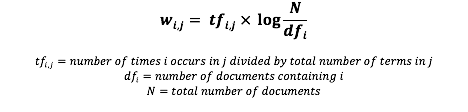

Il existe la possibilité d'importer directement le TF-IDF dans sklearn

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
TFIDF=TfidfVectorizer(analyzer=clean_text_stemming)
X_tfidf=TFIDF.fit_transform(MailData['text'])

In [28]:
print(X_tfidf.shape)
print(TFIDF.get_feature_names()[1000:8000:1000])

(5568, 8071)
['acwicmb3cktz8r74', 'chk', 'filth', 'janinexx', 'next', 'restock', 'termsappli']


In [29]:
TFIDF_df=pd.DataFrame(X_tfidf.toarray())
TFIDF_df.columns=TFIDF.get_feature_names()

In [31]:
TFIDF_df.head(1)

,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,...,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature Engineering 

- [Création d'une feature](#Création-de-features)
- [Evaluation d'une feature](#Evaluation-de-features)
- [Identification de transformations](#Identification-de-transformation)
- [Box-Cox transformation](#Box-Cox-tranformation)

Dans une logique prédictive, il peut être intéressant de créer d'autres variables basées sur les caractéristiques des données textuelles (nombre de ponctuations, longueur...)

### Création de features

Commençons par créer une feature qui compte le nombre de caractères non blancs

In [13]:
MailData['body_len']=MailData['cleaned_text'].apply(lambda x:len(x)-x.count(' '))

In [14]:
MailData.head()

,label,text,cleaned_text,body_len
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,search right word thank breather promis wont take help grant fulfil promis wonder bless time,78
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...,109
2,ham,"Nah I don't think he goes to usf, he lives around here though",nah think goe usf live around though,30
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aid patent,38
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday,10


<b>Pourcentage de ponctuations dans un texte:</b>

In [15]:
def percentage_punct(text):
    pct_punct=sum([1 for char in text if char in string.punctuation])/len(text)   
    return round(pct_punct,3)*100

In [16]:
percentage_punct("Il fait beau. Je vais aller courir.")

5.7

In [17]:
MailData['Pct_punct']=MailData['text'].apply(lambda x:percentage_punct(x))

In [18]:
MailData.head()

,label,text,cleaned_text,body_len,Pct_punct
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,search right word thank breather promis wont take help grant fulfil promis wonder bless time,78,2.0
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...,109,3.9
2,ham,"Nah I don't think he goes to usf, he lives around here though",nah think goe usf live around though,30,3.3
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aid patent,38,2.6
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday,10,5.7


### Evaluation de features

Pour cette partie, nous allons utiliser matplotlib (pyplot), et numpy. Nous allons commencé par afficher l'histogramme de body_len (ayant comme label=spam)

In [19]:
%matplotlib inline

<b>Analyse des longueurs de texte</b>

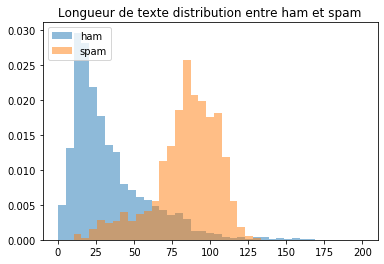

In [30]:
bins=np.linspace(0,200,40)
pyplot.hist(MailData[MailData['label']=='ham']['body_len'],bins,alpha=0.5,density=True,label='ham')
pyplot.hist(MailData[MailData['label']=='spam']['body_len'],bins,alpha=0.5,density=True,label='spam')
pyplot.legend(loc='upper left')
pyplot.title('Longueur de texte distribution entre ham et spam')
pyplot.show()

On remarque que les spams sont régulièrement plus longs que les hams !<br>
<br>
<b>Analyse des pourcentages de ponctuation</b>

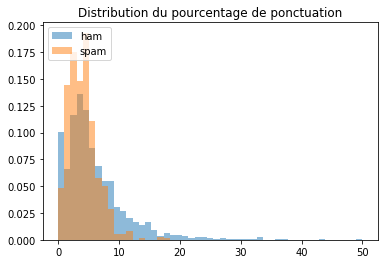

In [31]:
bins=np.linspace(0,50,50)
pyplot.hist(MailData[MailData['label']=='ham']['Pct_punct'],bins,alpha=0.5,density=True,label='ham')
pyplot.hist(MailData[MailData['label']=='spam']['Pct_punct'],bins,alpha=0.5,density=True,label='spam')
pyplot.legend(loc='upper left')
pyplot.title('Distribution du pourcentage de ponctuation')
pyplot.show()

Un peu plus de variance de ponctuation pour ham

### Identification de transformation

Commençons par afficher la répartition générale de la body_len

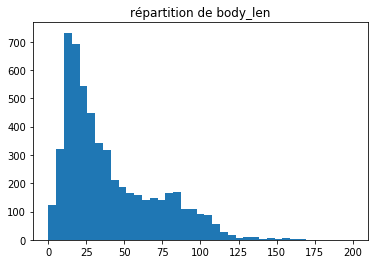

In [35]:
bins=np.linspace(0,200,40)
pyplot.hist(MailData['body_len'],bins)
pyplot.title('répartition de body_len')
pyplot.show()

Répartition bimodale.

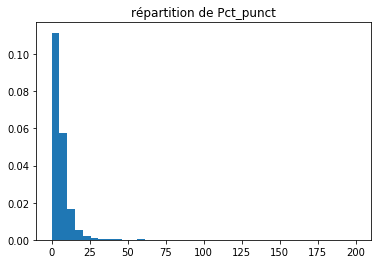

In [38]:
bins=np.linspace(0,200,40)
pyplot.hist(MailData['Pct_punct'],bins,density=True)
pyplot.title('répartition de Pct_punct')
pyplot.show()

Répartition assymétrique

### Box-Cox tranformation

Transformation par l'exposant. Exemple, Box-Cox Transformation à paramètre 2 revient à passer de y à y**2. Exemple ici très simple:

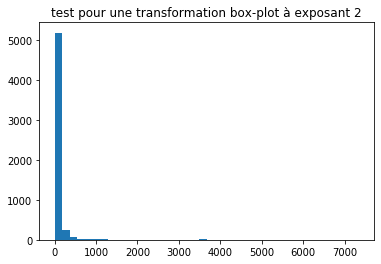

In [40]:
bins=40
pyplot.hist((MailData['Pct_punct'])**2,bins)
pyplot.title('test pour une transformation box-plot à exposant 2')
pyplot.show()

Transformation illogique, car écrase encore un peu plus la distributon de la variable, nous allons donc faire une fonction qui teste différentes box plot transformations à paramètres entre 0 et 1

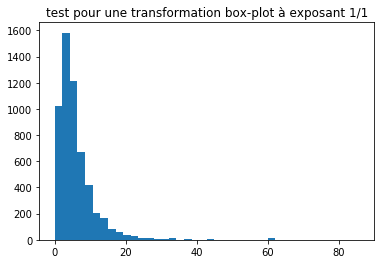

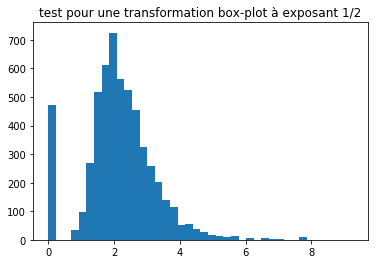

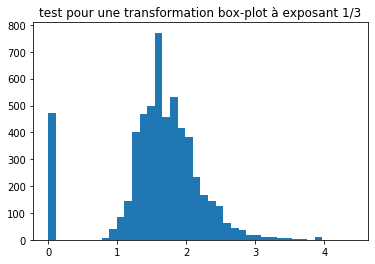

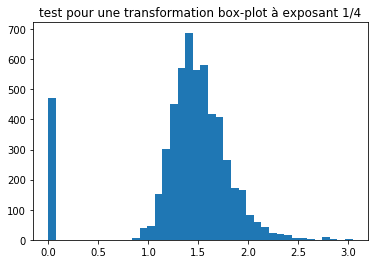

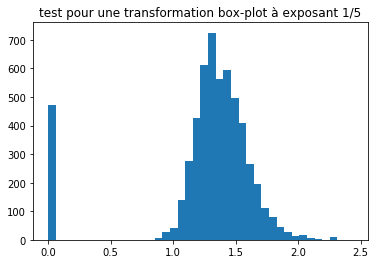

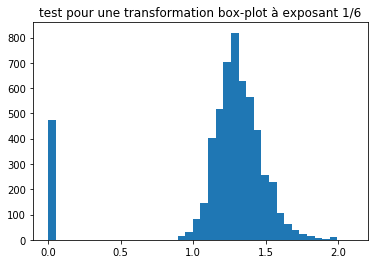

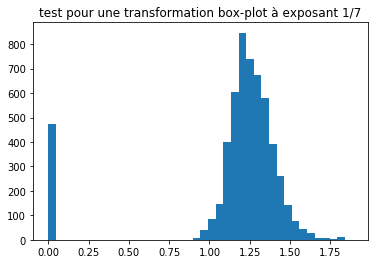

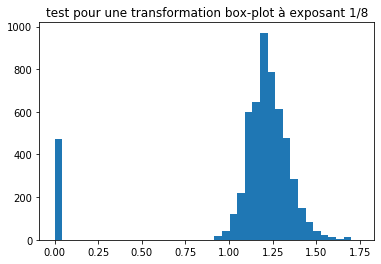

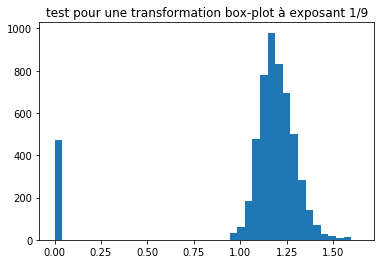

In [41]:
for i in np.arange(1,10,1):
    pyplot.hist((MailData['Pct_punct'])**(1/i),bins)
    pyplot.title('test pour une transformation box-plot à exposant 1/{}'.format(i))
    pyplot.show()

## Machine Learning 

- [Métriques d'évaluation](#Métriques-d'évaluation)
- [Random Forest: Apprentissage](#Random-Forest:-Apprentissage)
- [Random Forest: Scoring](#Random-Forest:-Scoring)
- [Random Forest: Autotuning Grid Search](#Random-Forest:-Grid-Search)
- [Random Forest: Evaluation](#Random-Forest:-Evaluation)
- [Gradient Boosting: Grid Search et évaluation](#Gradient-Boosting:-Grid-Search)
- [Sélection du modèle](#Sélection-du-modèle)

### Métriques d'évaluation

Pour la suite de la formation, il est intéressant, de spécifier quelle méthodologie de validation de modèles nous allons utiliser: le k-fold cross validation. Cette méthode permet de réaliser k sous échantillons distincts et tester successivement l'apprentissage du modèle sur k-1 échantillons, et valider sur le k-ème. La cross-validation est terminée quand l'ensemble des échantillons auront été testés.

<img src="Cross validation.png">

Une fois les tests réalisés, trois indicateurs de qualité sont possibles:

<img src="precision indicators.png">

Au cas où, voici le code permettant de recréer l'ensemble des étapes nécessaires: 
- Import de la stoplist
- Import du PorterStemmer, nécessaire au stemming
- Import du dataframe
- Création de la fonction clean_text: qui supprime la ponctuation, split en tokens, et réalise le stemming
- Vectorisation avec la méthode TF-IDF
- Ajout des features calculées (longueur de texte, % ponctuation) aux vecteurs

In [47]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])

X_features = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8094,8095,8096,8097,8098,8099,8100,8101,8102,8103
0,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,135,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Random Forest: Apprentissage 

On importe RandomForestClassifier 

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
print(dir(RandomForestClassifier()))
print(RandomForestClassifier())

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_estimator_type', '_get_param_names', '_get_tags', '_make_estimator', '_more_tags', '_required_parameters', '_set_oob_score', '_validate_X_predict', '_validate_estimator', '_validate_y_class_weight', 'apply', 'base_estimator', 'bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'decision_path', 'estimator_params', 'feature_importances_', 'fit', 'get_params', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_est

In [55]:
from sklearn.model_selection import KFold, cross_val_score

On créer deux objets, rf, et k_fold qui reprend ce qui a été expliqué ci-dessus:

In [58]:
rf=RandomForestClassifier(n_jobs=-1)
k_fold=KFold(n_splits=5)

In [60]:
cross_val_score(rf,X_features,data['label'],cv=k_fold,scoring='accuracy',n_jobs=-1)

array([0.97486535, 0.97845601, 0.97394429, 0.96316262, 0.97394429])

On voit les 5 résultats sur les 5 échantillons testés (5-fold)

### Random Forest: Scoring

<b> Split de la données en deux échantillons pour scorer les donneées </b>

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, Y_train, Y_test= train_test_split(X_features,data['label'],test_size=0.2)

<b> Construction d'un Random Forest de 50 arbres de profondeur maximal 20 

In [67]:
rf=RandomForestClassifier(n_estimators=50,max_depth=20,n_jobs=-1)
rf_model=rf.fit(X_train,Y_train)

<b> Affichage des 10 plus importantes variables </b>

In [69]:
sorted(zip(rf_model.feature_importances_,X_train.columns),reverse=True)[0:10]

[(0.06557910785440713, 'body_len'),
 (0.03848485641659883, 7350),
 (0.036379437671735675, 1803),
 (0.026298896911181358, 2031),
 (0.024609613044317618, 5724),
 (0.021377112874946706, 3134),
 (0.0204407626521162, 6746),
 (0.019959850086330246, 7027),
 (0.017184277400374003, 5988),
 (0.015630426199583283, 4796)]

<b> Scoring </b>

In [71]:
Y_pred= rf_model.predict(X_test)

<b> Affichage des différents indicateurs </b>

In [75]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(Y_test,Y_pred,pos_label="spam",average='binary')

In [82]:
print("Precision : {} / Recall : {} / Accuracy : {}".format(round(precision,3),
                                                            round(recall,3),
                                                            round((Y_test==Y_pred).sum()/len(Y_pred),3)))

Precision : 1.0 / Recall : 0.656 / Accuracy : 0.96


### Random Forest: Grid Search

In [93]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

# TF-IDF
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])
X_tfidf_feat = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)

# CountVectorizer
count_vect = CountVectorizer(analyzer=clean_text)
X_count = count_vect.fit_transform(data['body_text'])
X_count_feat = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_count.toarray())], axis=1)

X_count_feat.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8094,8095,8096,8097,8098,8099,8100,8101,8102,8103
0,128,4.7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,49,4.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,62,3.2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,28,7.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,135,4.4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Nous allons chercher automatiquement les hypermaramètres intéressants, on va commencer par essayer de construire nous même une fonction qui testerait différents paramètrages:

In [87]:
def RF_train(n_est,depth):
    RandomForestClassifier(n_estimators=n_est,max_depth=depth,n_jobs=-1)
    rf_model=rf.fit(X_train,Y_train)
    Y_pred= rf_model.predict(X_test)
    precision, recall, fscore, support = score(Y_test,Y_pred,pos_label="spam",average='binary')
    print("Est: {} / depth : {} / Precision : {} / Recall : {} / Accuracy : {}".format(n_est,depth,round(precision,3),
                                                            round(recall,3),
                                                            round((Y_test==Y_pred).sum()/len(Y_pred),3)))

In [88]:
for n_est in np.arange(10,100,10):
    for depth in {10,20,30,None}:
        RF_train(n_est,depth)

        

Est: 10 / depth : 10 / Precision : 1.0 / Recall : 0.626 / Accuracy : 0.956
Est: 10 / depth : 20 / Precision : 1.0 / Recall : 0.641 / Accuracy : 0.958
Est: 10 / depth : None / Precision : 1.0 / Recall : 0.588 / Accuracy : 0.952
Est: 10 / depth : 30 / Precision : 1.0 / Recall : 0.595 / Accuracy : 0.952
Est: 20 / depth : 10 / Precision : 1.0 / Recall : 0.588 / Accuracy : 0.952
Est: 20 / depth : 20 / Precision : 1.0 / Recall : 0.649 / Accuracy : 0.959
Est: 20 / depth : None / Precision : 1.0 / Recall : 0.649 / Accuracy : 0.959
Est: 20 / depth : 30 / Precision : 1.0 / Recall : 0.573 / Accuracy : 0.95
Est: 30 / depth : 10 / Precision : 1.0 / Recall : 0.611 / Accuracy : 0.954
Est: 30 / depth : 20 / Precision : 1.0 / Recall : 0.618 / Accuracy : 0.955
Est: 30 / depth : None / Precision : 1.0 / Recall : 0.618 / Accuracy : 0.955
Est: 30 / depth : 30 / Precision : 1.0 / Recall : 0.656 / Accuracy : 0.96
Est: 40 / depth : 10 / Precision : 1.0 / Recall : 0.58 / Accuracy : 0.951
Est: 40 / depth : 20 /

<b> Réalisons désormais le Grid Search à travers GridSearchCV

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
rf=RandomForestClassifier()
params={'n_estimators':[10,150,300],
       'max_depth':[30,60,90,None]}

In [94]:
gs=GridSearchCV(rf,params,cv=5,n_jobs=-1)
gs_fit=gs.fit(X_tfidf_feat,data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score',ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
10,35.492203,2.008119,0.385475,0.036340,None,150,"{'max_depth': None, 'n_estimators': 150}",0.978456,0.981149,0.973944,0.969452,0.969452,0.974491,0.004715,1
8,66.452785,4.650162,0.598880,0.076246,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.978456,0.979354,0.975741,0.967655,0.970350,0.974311,0.004575,2
7,33.501823,1.820426,0.385956,0.033756,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.976661,0.974865,0.975741,0.969452,0.970350,0.973414,0.002938,3
11,64.231339,1.834518,0.429725,0.092576,None,300,"{'max_depth': None, 'n_estimators': 300}",0.977558,0.973968,0.973944,0.967655,0.970350,0.972695,0.003398,4
4,27.746803,0.218045,0.330987,0.060229,60,150,"{'max_depth': 60, 'n_estimators': 150}",0.977558,0.973070,0.973046,0.966757,0.970350,0.972156,0.003556,5


### Gradient Boosting: Grid Search

On va suivre la même logique que pour le RandomForest

In [95]:
from sklearn.ensemble import GradientBoostingClassifier
print(dir(GradientBoostingClassifier))
print(GradientBoostingClassifier())

['_SUPPORTED_LOSS', '__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_initialized', '_check_params', '_clear_state', '_compute_partial_dependence_recursion', '_estimator_type', '_fit_stage', '_fit_stages', '_get_param_names', '_get_tags', '_init_state', '_is_initialized', '_make_estimator', '_more_tags', '_raw_predict', '_raw_predict_init', '_required_parameters', '_resize_state', '_staged_raw_predict', '_validate_estimator', '_validate_y', 'apply', 'decision_function', 'feature_importances_', 'fit', 'get_params', 'predict', 'predict_log_proba', 'predict_proba', 'score', 'set_params', 

In [102]:
def train_GB(est, max_depth, lr):
    gb = GradientBoostingClassifier(n_estimators=est, max_depth=max_depth, learning_rate=lr)
    gb_model = gb.fit(X_train, Y_train)
    y_pred = gb_model.predict(X_test)
    precision, recall, fscore, train_support = score(Y_test, y_pred, pos_label='spam', average='binary')
    print('Est: {} / Depth: {} / LR: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        est, max_depth, lr, round(precision, 3), round(recall, 3), 
        round((y_pred==Y_test).sum()/len(y_pred), 3)))

In [103]:
for n_est in [50, 100, 150]:
    for max_depth in [3, 7, 11, 15]:
        for lr in [0.01, 0.1, 1]:
            train_GB(n_est, max_depth, lr)

C:\Users\frajoz\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Est: 50 / Depth: 3 / LR: 0.01 ---- Precision: 0.0 / Recall: 0.0 / Accuracy: 0.882
Est: 50 / Depth: 3 / LR: 0.1 ---- Precision: 0.943 / Recall: 0.756 / Accuracy: 0.966
Est: 50 / Depth: 3 / LR: 1 ---- Precision: 0.92 / Recall: 0.794 / Accuracy: 0.968
Est: 50 / Depth: 7 / LR: 0.01 ---- Precision: 1.0 / Recall: 0.008 / Accuracy: 0.883
Est: 50 / Depth: 7 / LR: 0.1 ---- Precision: 0.884 / Recall: 0.817 / Accuracy: 0.966
Est: 50 / Depth: 7 / LR: 1 ---- Precision: 0.899 / Recall: 0.817 / Accuracy: 0.968
Est: 50 / Depth: 11 / LR: 0.01 ---- Precision: 1.0 / Recall: 0.015 / Accuracy: 0.884
Est: 50 / Depth: 11 / LR: 0.1 ---- Precision: 0.893 / Recall: 0.824 / Accuracy: 0.968
Est: 50 / Depth: 11 / LR: 1 ---- Precision: 0.867 / Recall: 0.847 / Accuracy: 0.967


C:\Users\frajoz\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Est: 50 / Depth: 15 / LR: 0.01 ---- Precision: 0.0 / Recall: 0.0 / Accuracy: 0.882
Est: 50 / Depth: 15 / LR: 0.1 ---- Precision: 0.886 / Recall: 0.832 / Accuracy: 0.968
Est: 50 / Depth: 15 / LR: 1 ---- Precision: 0.865 / Recall: 0.832 / Accuracy: 0.965
Est: 100 / Depth: 3 / LR: 0.01 ---- Precision: 0.932 / Recall: 0.519 / Accuracy: 0.939
Est: 100 / Depth: 3 / LR: 0.1 ---- Precision: 0.947 / Recall: 0.824 / Accuracy: 0.974
Est: 100 / Depth: 3 / LR: 1 ---- Precision: 0.913 / Recall: 0.802 / Accuracy: 0.968
Est: 100 / Depth: 7 / LR: 0.01 ---- Precision: 0.93 / Recall: 0.71 / Accuracy: 0.96
Est: 100 / Depth: 7 / LR: 0.1 ---- Precision: 0.894 / Recall: 0.84 / Accuracy: 0.969
Est: 100 / Depth: 7 / LR: 1 ---- Precision: 0.888 / Recall: 0.847 / Accuracy: 0.969
Est: 100 / Depth: 11 / LR: 0.01 ---- Precision: 0.886 / Recall: 0.771 / Accuracy: 0.961
Est: 100 / Depth: 11 / LR: 0.1 ---- Precision: 0.899 / Recall: 0.817 / Accuracy: 0.968
Est: 100 / Depth: 11 / LR: 1 ---- Precision: 0.902 / Recall: 0

<b> Utilisation de GridSearchCV

In [ ]:
gb=GradientBoostingClassifier()
params={'n_estimators':[10,150,300],
       'max_depth':[30,60,90,None]}
gs=GridSearchCV(gb,params,cv=5,n_jobs=-1)
gs_fit=gs.fit(X_tfidf_feat,data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score',ascending=False)[0:5]


### Sélection du modèle

Process de sélection: 
- Split en apprentissage et test 
- Entrainer la vectorisation sur la table d'apprentissage et l'appliquer en transformation sur le test
- Utiliser les meilleurs modèles GB et RF selon le grid search et les appliquer sur la table de test
- Comparer les deux modèles

<b>- Split en apprentissage et test 


In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(X_features,data['label'],test_size=0.2)

<b>- Entrainer la vectorisation sur la table d'apprentissage et l'appliquer en transformation sur le test

In [ ]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit= tfidf_vect.fit(X_train['body_text'])

tfidf_train = tfidf_vect_fit.transform(X_train['body_text'])
tfidf_test = tfidf_vect_fit.transform(X_test['body_text'])

#X_train et le nouveau dataframe n'ont pas le même index, il est important de le reseter.
X_train_vect = pd.concat([X_train['body_len','punct%'].reset_index(drop=True), 
                          pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test['body_len','punct%'].reset_index(drop=True), 
                          pd.DataFrame(tfidf_test.toarray())], axis=1)

<b> - Comparer les deux modèles

In [ ]:
#Important d'avoir l'information du temps que ça peut prendre ! 
import time

Random Forest: 

In [ ]:
rf = RandomForestClassifier(n_estimators=150,max_depth=None,n_jobs=-1)

start=time.time()
rf_model=rf.fit(X_train,y_train)
end=time.time()
fit_duration=end-start
start=time.time()
y_pred= rf_model.predict(X_test)
end=time.time()
pred_duration=end-start
precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Est: {} / Depth: {} / LR: {} ---- Precision: {} / Recall: {} / Accuracy: {} / durée apprentissage : {} / durée prédiction : {}'.format(
        est, max_depth, lr, round(precision, 3), round(recall, 3), 
        round((y_pred==y_test).sum()/len(y_pred), 3),
        round(fit_duration,3),
        round(pred_duration,3)))

Gradient Boosting

In [ ]:
gb = GradientBoostingClassifier(n_estimators=150,max_depth=None,n_jobs=-1)

start=time.time()
gb_model=gb.fit(X_train,y_train)
end=time.time()
fit_duration=end-start
start=time.time()
y_pred= gb_model.predict(X_test)
end=time.time()
pred_duration=end-start
precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Est: {} / Depth: {} / LR: {} ---- Precision: {} / Recall: {} / Accuracy: {} / durée apprentissage : {} / durée prédiction : {}'.format(
        est, max_depth, lr, round(precision, 3), round(recall, 3), 
        round((y_pred==y_test).sum()/len(y_pred), 3),
        round(fit_duration,3),
        round(pred_duration,3)))